In [1]:
import numpy as np
import pandas as pd

In [405]:
# read in the data.
# this is a randomly sampled half of the complaints data from the CFPB website:
# https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data
df = pd.read_csv('./data/complaints_random_half_with_narratives.csv', index_col="Complaint ID")

/Users/gracezhang/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [406]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,,,,,
2279955,2017-01-08,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Having problems with customer service,"In XX/XX/XXXX, XX/XX/XXXX, and XX/XX/XXXX, my ...",Company has responded to the consumer and the ...,Utah System of Higher Education,WY,820XX,NaN,Consent provided,Web,2017-02-14,Closed,Yes,No
2096088,2016-09-06,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,I lost my wallet last year. Since that time I ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,OH,441XX,NaN,Consent provided,Web,2016-09-06,Closed with non-monetary relief,Yes,No


In [7]:
df.shape

(1076212, 16)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1076212 entries, 2279955 to 716431
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Date received                 1076212 non-null  object
 1   Product                       1076212 non-null  object
 2   Sub-product                   958716 non-null   object
 3   Issue                         1076212 non-null  object
 4   Sub-issue                     765870 non-null   object
 5   Company public response       447314 non-null   object
 6   Company                       1076212 non-null  object
 7   State                         1055495 non-null  object
 8   ZIP code                      969152 non-null   object
 9   Tags                          134444 non-null   object
 10  Consumer consent provided?    719128 non-null   object
 11  Submitted via                 1076212 non-null  object
 12  Date sent to company          1076212

In [68]:
df['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    376516
Debt collection                                                                 181014
Mortgage                                                                        165497
Credit reporting                                                                 70133
Credit card or prepaid card                                                      56897
Checking or savings account                                                      46965
Credit card                                                                      44656
Bank account or service                                                          43108
Student loan                                                                     31061
Consumer Loan                                                                    15689
Money transfer, virtual currency, or money service                               15189
Vehicle loan or lease                      

In [345]:
df['Issue'].value_counts().head(10)

Incorrect information on your report                                                240006
Problem with a credit reporting company's investigation into an existing problem     95572
Loan modification,collection,foreclosure                                             56328
Attempts to collect debt not owed                                                    51761
Incorrect information on credit report                                               51263
Loan servicing, payments, escrow account                                             38564
Improper use of your report                                                          34051
Cont'd attempts collect debt not owed                                                30417
Managing an account                                                                  29671
Written notification about debt                                                      25232
Name: Issue, dtype: int64

In [72]:
df['Submitted via'].value_counts()

Web            858047
Referral       107202
Phone           57945
Postal mail     39798
Fax             13009
Email             211
Name: Submitted via, dtype: int64

In [280]:
df['Company'].value_counts().head(20)

EQUIFAX, INC.                             145566
TRANSUNION INTERMEDIATE HOLDINGS, INC.    122883
Experian Information Solutions Inc.       118275
BANK OF AMERICA, NATIONAL ASSOCIATION      51476
WELLS FARGO & COMPANY                      43556
JPMORGAN CHASE & CO.                       39787
CITIBANK, N.A.                             33337
CAPITAL ONE FINANCIAL CORPORATION          27737
Navient Solutions, LLC.                    17255
SYNCHRONY FINANCIAL                        16264
Ocwen Financial Corporation                15551
U.S. BANCORP                               12505
NATIONSTAR MORTGAGE                        12008
AMERICAN EXPRESS COMPANY                   10109
PNC Bank N.A.                               8750
PORTFOLIO RECOVERY ASSOCIATES INC           8462
ENCORE CAPITAL GROUP INC.                   8030
DISCOVER BANK                               7849
Ditech Financial LLC                        7553
TD BANK US HOLDING COMPANY                  7516
Name: Company, dtype

# Preliminary visualizations

In [15]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

In [424]:
# Convert the date (as provided in the original sheet) into separated day, month, and year columns
df['date_temp'] = pd.to_datetime(df['Date sent to company'])
df['day'] = df['date_temp'].dt.strftime('%d')
df['month'] = df['date_temp'].dt.strftime('%m')
df['year'] = df['date_temp'].dt.strftime('%Y')
df.drop(['date_temp'], axis = 1, inplace=True)

In [301]:
df['year'].value_counts().sort_index()

2011      1195
2012     35858
2013     53718
2014     76540
2015     84024
2016     95652
2017    122217
2018    128726
2019    138821
2020    221687
2021    117774
Name: year, dtype: int64

## Plot number of complaints per year

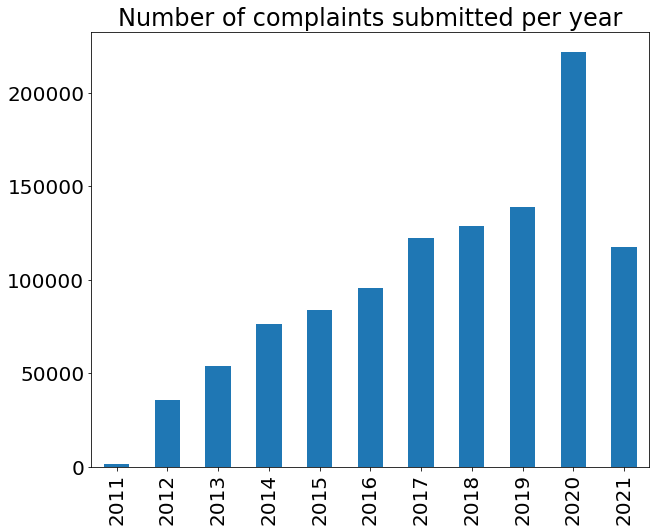

In [346]:
df['year'].value_counts().sort_index().plot(kind='bar', title = "Number of complaints submitted per year")
plt.show()

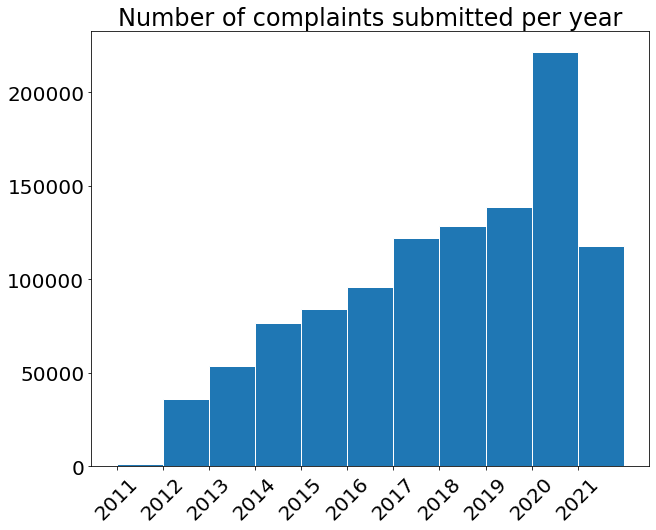

In [370]:
plt.hist([df['year'].astype('int64')], bins=list(range(2011,2023,1)), edgecolor='white')
plt.title("Number of complaints submitted per year")
plt.xticks(list(range(2011,2022,1)), rotation=45)  # Set text labels and properties.
plt.show()

## Question: why did complaints suddenly jump in 2020?
### 1. Let's try breaking it down by submission type.

['Web' 'Referral' 'Phone' 'Postal mail' 'Fax' 'Email']


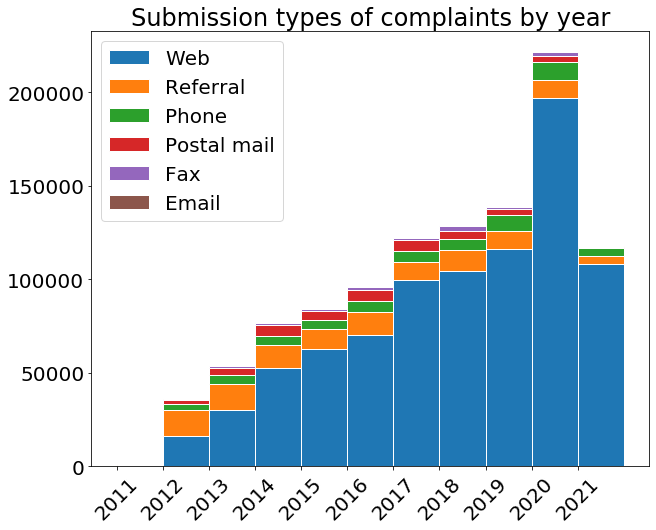

In [373]:
submission_methods = df['Submitted via'].unique()
print(submission_methods)

complaints_by_method = []

for method in submission_methods:
    complaints_by_method.append(df[df['Submitted via'] == method])
    
plt.hist([method['year'].astype('int64') for i, method in enumerate(complaints_by_method)],label = submission_methods , bins=list(range(2011,2023,1)), edgecolor='white', stacked=True)

plt.title("Submission types of complaints by year")
plt.xticks(list(range(2011,2022,1)), rotation=45)
plt.legend()
plt.show()

Submission type does not seem to explain the sudden jump in 2020. All years have predominantly web submissions.

### 2. Maybe we can try breaking it down by type of issue.

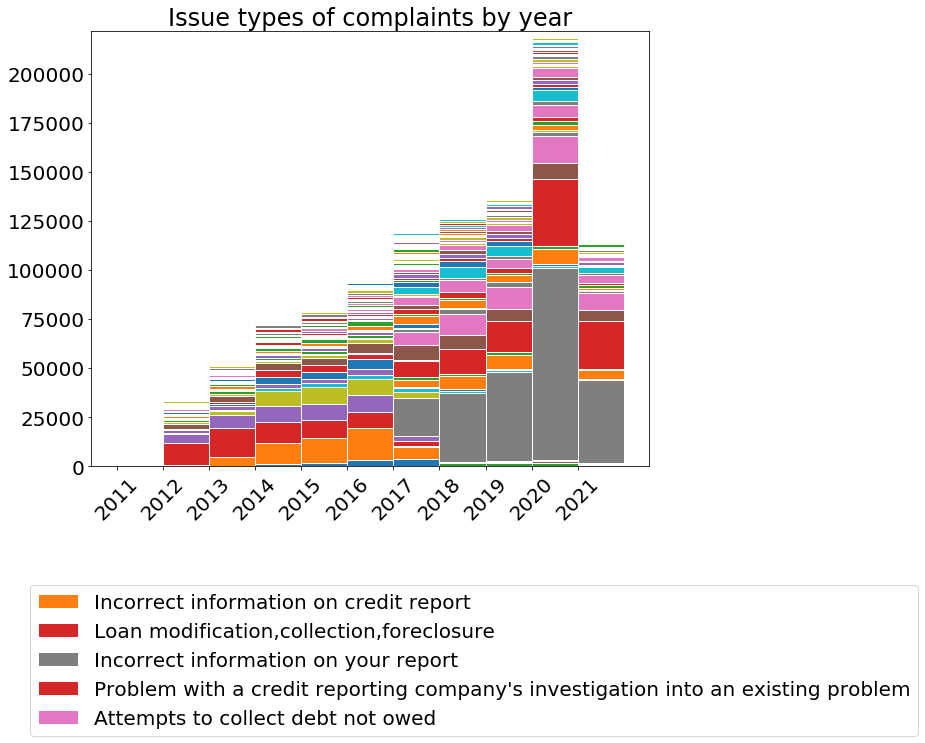

In [382]:
issues = df['Issue'].unique()

len(complaints_by_issue[3])

complaints_by_issue = []

for issue in issues:
    complaints_by_issue.append(df[df['Issue'] == issue])

#include only the most common issues in the legend.
labels = []
for i, issue in enumerate(issues):
    if len(complaints_by_issue[i]) > 50000:
        labels.append(issues[i])
    else: 
        labels.append('')

fig, ax = plt.subplots()          
ax.hist([issue['year'].astype('int64') for i, issue in enumerate(complaints_by_issue)], 
         label = labels, bins=list(range(2011,2023,1)), edgecolor='white', stacked=True)

plt.title("Issue types of complaints by year")
plt.xticks(list(range(2011,2022,1)), rotation=45)
plt.legend(bbox_to_anchor=(1.5, -0.25))
plt.show()

### Breakdown by company

In [383]:
#Keep top 3 most common companies, and rename all other companies as "Other" 
n = 3
top_3 = df['Company'].value_counts()[:n].index.tolist()
print(top_3)

['EQUIFAX, INC.', 'TRANSUNION INTERMEDIATE HOLDINGS, INC.', 'Experian Information Solutions Inc.']


In [384]:
df_simplified_companies = df.copy()

# Convert the date (as provided in the original sheet) into separated day, month, and year columns
df_simplified_companies['date_temp'] = pd.to_datetime(df_simplified_companies['Date sent to company'])
df_simplified_companies['day'] = df_simplified_companies['date_temp'].dt.strftime('%d')
df_simplified_companies['month'] = df_simplified_companies['date_temp'].dt.strftime('%m')
df_simplified_companies['year'] = df_simplified_companies['date_temp'].dt.strftime('%Y')
df_simplified_companies.drop(['date_temp'], axis = 1, inplace=True)

In [385]:
def company_modifier(x):
    if x in top_3:
        return x
    else:
        return "Other"
    
df_simplified_companies["Company"] = df_simplified_companies["Company"].apply(company_modifier)

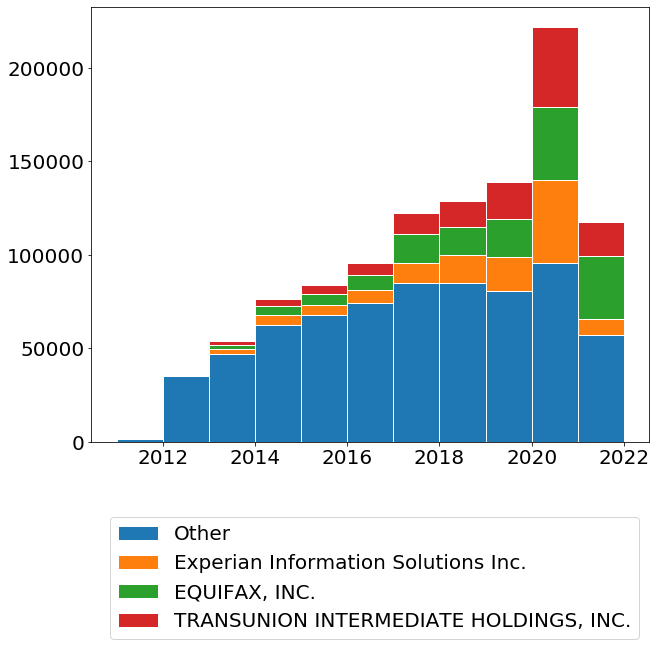

In [386]:
companies = df_simplified_companies['Company'].unique()

complaints_by_company = []

for company in companies:
    complaints_by_company.append(df_simplified_companies[df_simplified_companies['Company'] == company])
    
#include only the most common companies in the legend.
labels = []
for i, company in enumerate(companies):
    if len(complaints_by_company[i]) > 100000:
        labels.append(companies[i])
    else: 
        labels.append('')

plt.hist([company['year'].astype('int64') for i, company in enumerate(complaints_by_company)], 
         label = labels, bins=list(range(2011,2023,1)), edgecolor='white', stacked=True)

plt.legend(bbox_to_anchor=(1, -0.15))
plt.show()

In [170]:
df[df['year'].astype('int64') == 2017]['Issue'].value_counts()

Incorrect information on your report                                                19111
Problem with a credit reporting company's investigation into an existing problem     7942
Improper use of your report                                                          7744
Attempts to collect debt not owed                                                    6605
Incorrect information on credit report                                               6257
                                                                                    ...  
Vehicle was damaged or destroyed the vehicle                                            2
Lender damaged or destroyed property                                                    2
Overdraft, savings, or rewards features                                                 2
Lender damaged or destroyed vehicle                                                     1
Problem with overdraft                                                                  1
Name: Issu

# Maybe let's try going down to the month level

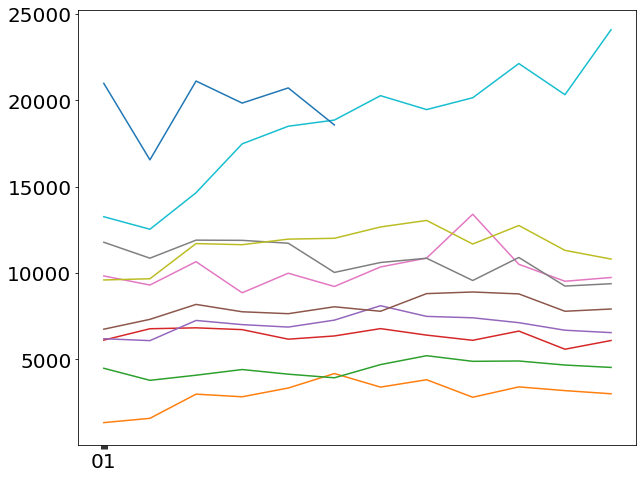

In [327]:
years = list(range(2011,2022,1))

for year in years:
    df[df['year'].astype('int64')== year]['month'].value_counts().sort_index().plot(kind='line')

plt.show()

Plot monthly by company, only for 2020

In [492]:
df_simplified_companies_2020 = df_simplified_companies[df_simplified_companies['year'].astype('int64')==2020]

df_simplified_companies_2020['Company'].value_counts()

Other                                     95362
Experian Information Solutions Inc.       44482
TRANSUNION INTERMEDIATE HOLDINGS, INC.    42444
EQUIFAX, INC.                             39399
Name: Company, dtype: int64

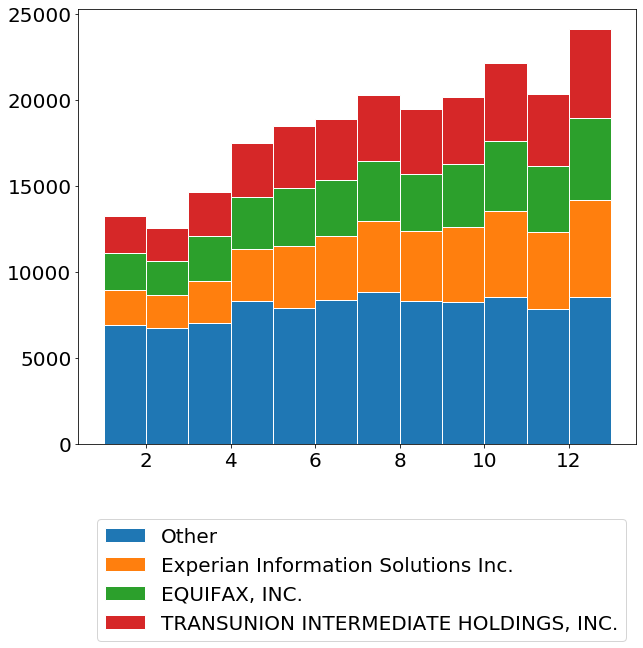

In [494]:
companies_2020 = df_simplified_companies['Company'].unique()

complaints_by_company_2020 = []

for company in companies_2020:
    complaints_by_company_2020.append(df_simplified_companies_2020[df_simplified_companies_2020['Company'] == company])
    
#include only the most common companies in the legend.
labels = []
for i, company in enumerate(companies_2020):
    if len(complaints_by_company_2020[i]) > 30000:
        labels.append(companies_2020[i])
    else: 
        labels.append('')

plt.hist([company['month'].astype('int64') for i, company in enumerate(complaints_by_company_2020)], 
         label = labels, bins=list(range(1,14,1)), edgecolor='white', stacked=True)

plt.legend(bbox_to_anchor=(1, -0.15))
plt.show()

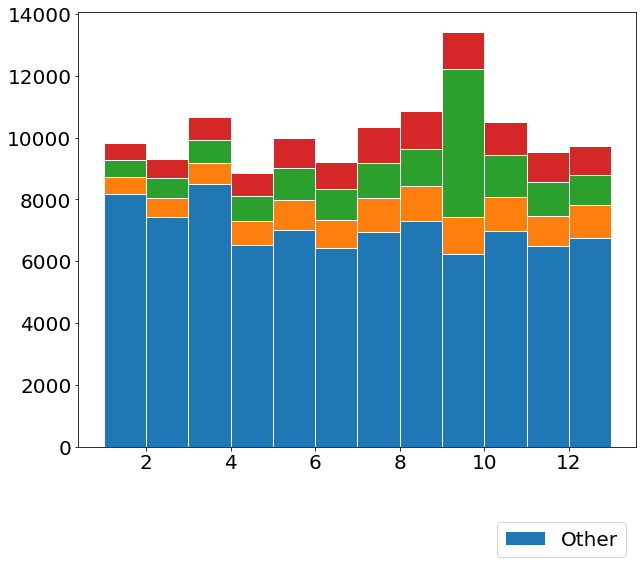

In [496]:
df_simplified_companies_2017 = df_simplified_companies[df_simplified_companies['year'].astype('int64')==2017]

df_simplified_companies_2017['Company'].value_counts()

companies_2017 = df_simplified_companies['Company'].unique()

complaints_by_company_2017 = []

for company in companies_2017:
    complaints_by_company_2017.append(df_simplified_companies_2017[df_simplified_companies_2017['Company'] == company])
    
#include only the most common companies in the legend.
labels = []
for i, company in enumerate(companies_2017):
    if len(complaints_by_company_2017[i]) > 30000:
        labels.append(companies_2017[i])
    else: 
        labels.append('')

plt.hist([company['month'].astype('int64') for i, company in enumerate(complaints_by_company_2017)], 
         label = labels, bins=list(range(1,14,1)), edgecolor='white', stacked=True)

plt.legend(bbox_to_anchor=(1, -0.15))
plt.show()

# COVID STUFF

In [479]:
df_2020 = df[df['year'].astype('int64')== 2020]
df_2020_covid = df_2020[df_2020['Consumer complaint narrative'].str.contains\
                        ("covid|virus|pandemic",\
                        na=False, case = False, regex = True)]
covid_complaints_2020 = df_2020_covid['Consumer complaint narrative']

In [482]:
df_2021 = df[df['year'].astype('int64')== 2021]
df_2021_covid = df_2021[df_2021['Consumer complaint narrative'].str.contains\
                        ("covid|virus|pandemic", na=False, case = False, regex = True)]
covid_complaints_2021 = df_2021_covid['Consumer complaint narrative']

In [483]:
print(covid_complaints_2020.size)
print(covid_complaints_2021.size)

6424
2612


In [486]:
print(df_2020_covid.shape[0]/df_2020.shape[0])
print(df_2021_covid.shape[0]/df_2021.shape[0])

0.028977793014475364
0.022178069862618235


In [489]:
df['narrative_is_null'] = df['Consumer complaint narrative'].isnull()

print(df_2020_covid.shape[0]/df_2020[df_2020['narrative_is_null']==False].shape[0])
print(df_2021_covid.shape[0]/df_2021[df_2021['narrative_is_null']==False].shape[0])

0.07383229128356013
0.06946993271097636


In [463]:
covid_complaints.size

8891

In [459]:
covid_complaints.value_counts()

I am a victim of identity theft. Due to the Corona Virus Pandemic, we are all facing which has me sitting still at home and I saw the recent news about the multiple XXXX Data breaches. I decided to look at my credit reports from the 3 major credit bureaus and found that someone had used my Identity. I have no idea how the theft took place. I also have no knowledge of any suspects. I did not receive any money, goods, or services as a result of identity theft. I contacted the Credit Bureau and told me to file an Identity Theft Report which I am doing. I appreciate your effort in getting this matter resolved. Thank you. Please let me know if you need any other information from me to block this information from my credit report. Thank you.                                                                                                                                                                                                                                                               

# Are there more narratives than usual in 2020 and 2021?

In [435]:
df['Consumer complaint narrative'].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [432]:
df[df['Consumer complaint narrative']=='There are many mistakes appear in my report without my understanding.']

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,day,month,year
Complaint ID,,,,,,,,,,,,,,,,,,,,
2774378,2018-01-07,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IL,NaN,NaN,Consent provided,Web,2018-01-07,Closed with explanation,Yes,NaN,07,01,2018
2811199,2018-02-11,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,NaN,"EQUIFAX, INC.",VA,245XX,NaN,Consent provided,Web,2018-02-11,Closed with explanation,Yes,NaN,11,02,2018
2757218,2017-12-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,765XX,NaN,Consent provided,Web,2017-12-16,Closed with explanation,Yes,NaN,16,12,2017
2768252,2017-12-30,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,236XX,NaN,Consent provided,Web,2017-12-30,Closed with explanation,Yes,NaN,30,12,2017
2787968,2018-01-20,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,342XX,NaN,Consent provided,Web,2018-01-20,Closed with explanation,Yes,NaN,20,01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090603,2018-12-04,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,NaN,"EQUIFAX, INC.",TX,770XX,NaN,Consent provided,Web,2018-12-04,Closed with explanation,Yes,NaN,04,12,2018
2830423,2018-03-01,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,951XX,NaN,Consent provided,Web,2018-03-01,Closed with non-monetary relief,Yes,NaN,01,03,2018
3067919,2018-11-07,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,There are many mistakes appear in my report wi...,NaN,"EQUIFAX, INC.",NC,282XX,NaN,Consent provided,Web,2018-11-07,Closed with explanation,Yes,NaN,07,11,2018


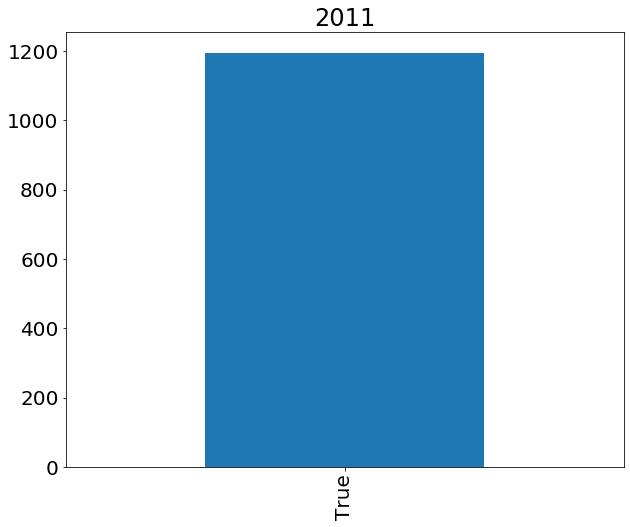

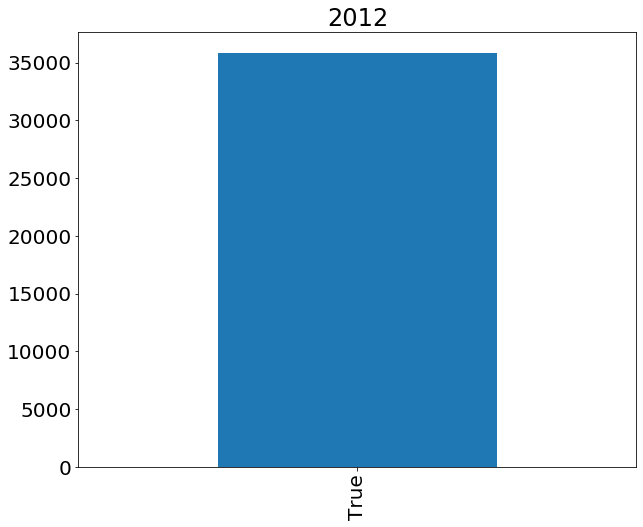

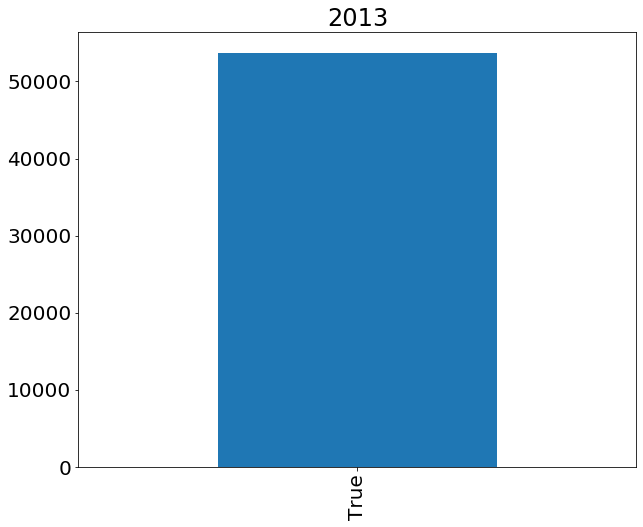

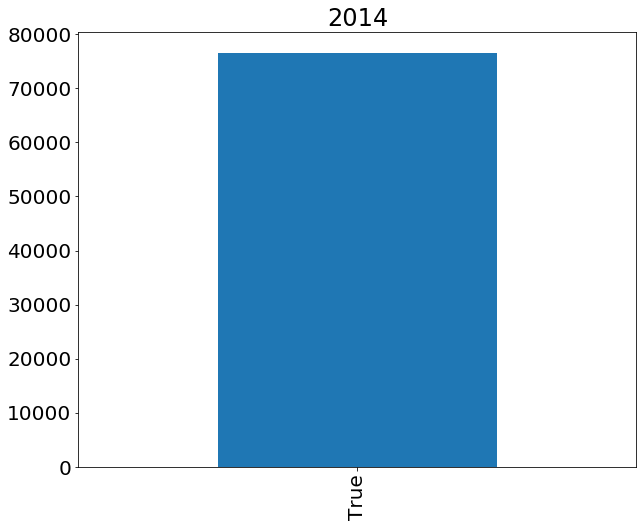

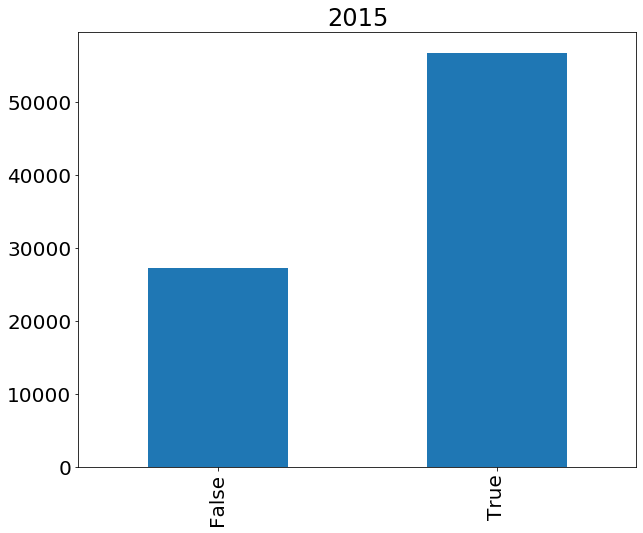

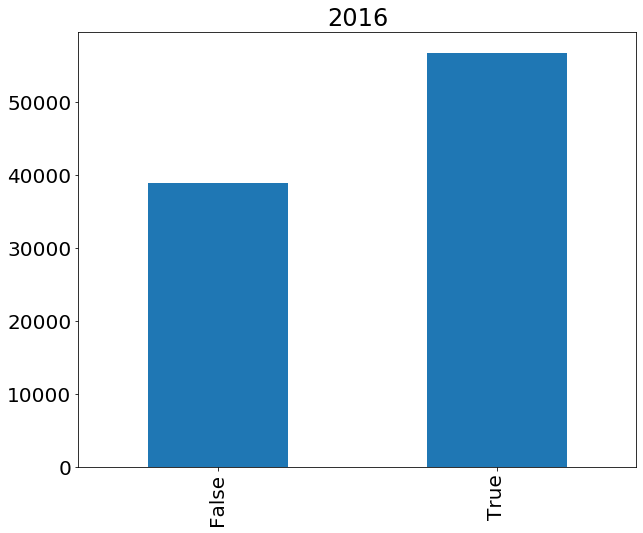

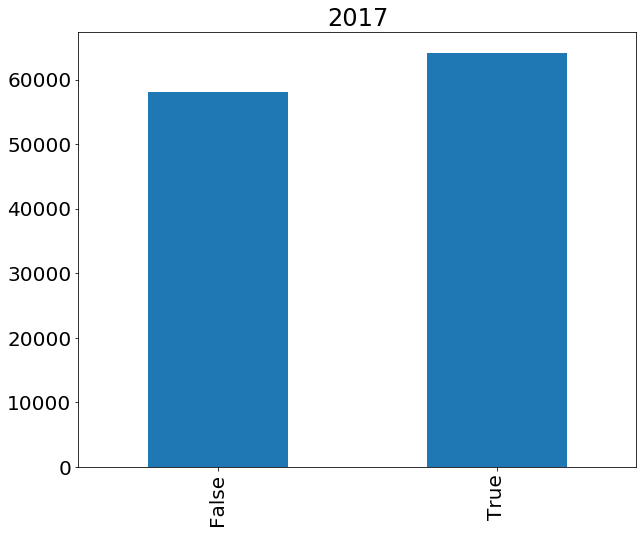

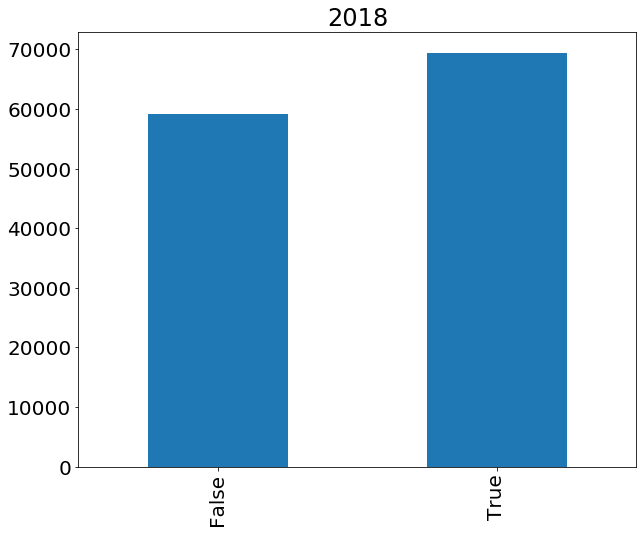

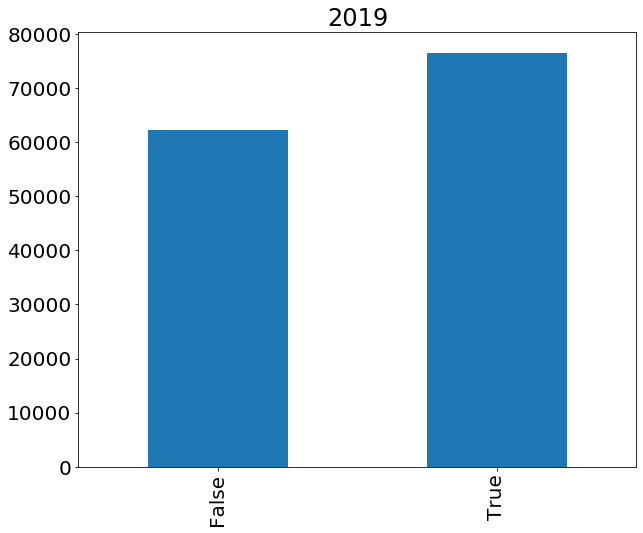

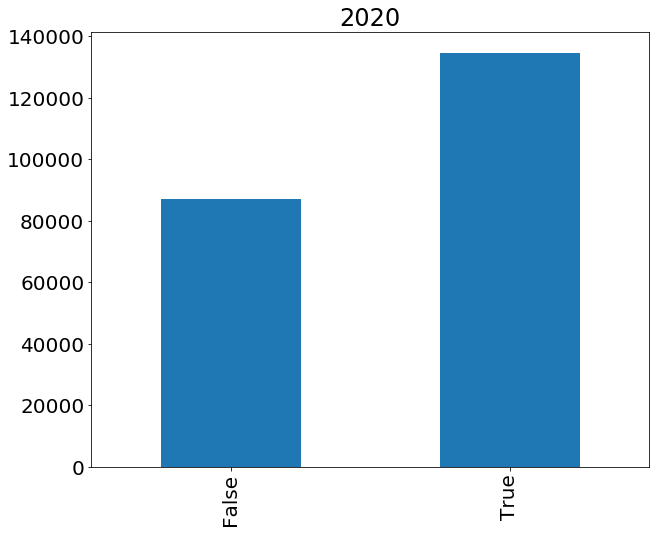

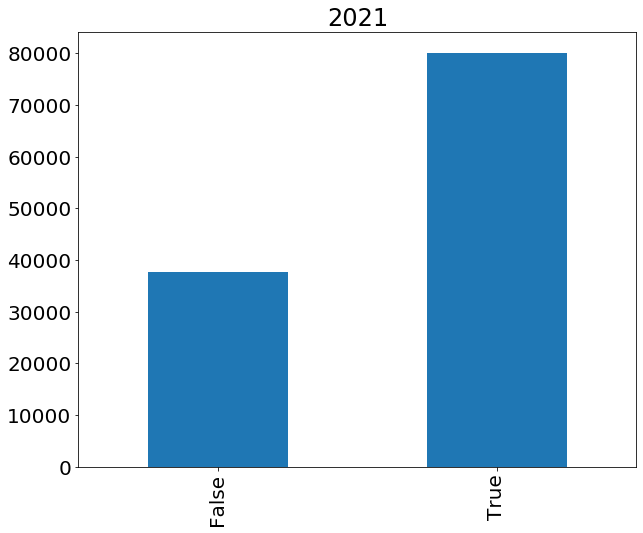

In [446]:
years = list(range(2011,2022,1))

for year in years:
    df[df['year'].astype('int64')== year]['narrative_is_null'].value_counts().sort_index().plot(kind='bar')
    plt.title('%d' %(year))
    plt.show()